In [1]:
from torchvision import models, datasets, transforms
import torch
import torch.nn as nn
import numpy as np
from imp import reload
from torch.autograd import Variable
from matplotlib import pyplot as plt


import utils
from utils import relative_effective_rank
import LayersAndNetworks as LN

In [6]:
0%10

0

## Data

In [2]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

cifar10_train = datasets.CIFAR10('data/', download=True, transform=transform, train=True)
cifar10_test = datasets.CIFAR10('data/', download=True, transform=transform, train=False)

train_loader = torch.utils.data.DataLoader(cifar10_train,
                                           batch_size=1,
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(cifar10_test,
                                           batch_size=1,
                                           shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


# Full Test Function

In [3]:
def fullRERankTest(train_loader, model_initializer, lossf_initializer,
                   file_loc=None,
                   n_per_trial=2, n_trials=10, 
                   which_layers='all', wrt_input=True, 
                   verbose=True):

    modelD = dict()
    modelD['file_loc'] = file_loc
    modelD['loss_f'] = lossf_initializer

    for i in range(n_trials):
        if verbose:
            print(f'testing initialization {i+1}/{n_trials}')
            
        modelD[f'trial {i}'] = dict()
        lossf = lossf_initializer()


        modelD[f'trial {i}']['model'] = model_initializer()

        if i == 0:
            modelD[f'trial {i}']['rel_eff_rank'], modelD['norm_c'] = relative_effective_rank(modelD[f'trial {i}']['model'], train_loader, lossf,
                                                                                return_normalizing_constant=True, n_ave=n_per_trial, 
                                                                                which_layers=which_layers, wrt_input=wrt_input)
        else:
            modelD[f'trial {i}']['rel_eff_rank'] = relative_effective_rank(modelD[f'trial {i}']['model'], train_loader, lossf,
                                                 normalizing_constants=modelD['norm_c'],
                                                 return_normalizing_constant=False, n_ave=n_per_trial, 
                                                 which_layers=which_layers, wrt_input=wrt_input)
        if verbose:
            print(modelD[f'trial {i}']['rel_eff_rank']) 
            plt.plot(modelD[f'trial {i}']['rel_eff_rank'])
            plt.show()

    if modelD['file_loc'] is not None:
        torch.save(modelD, modelD['file_loc'])
    return modelD
    #utils.play_alert()

## ResNet

In [3]:
res18 = dict()
res18['lossf'] = nn.NLLLoss()
res18['filename'] = '/models/res18.pt'

hidden_layers = [3] +  [64]*2 + [128]*2 + [256]*2 + [512]*3
res18['model'] = LN.BlockNet(3, hidden_layers, 10, block_type=LN.ResBlock, objective_func=nn.LogSoftmax(dim=1))
res18['optim'] = torch.optim.Adam(res18['model'].parameters())

In [4]:
res18['rel_eff_rank'], res18['norm_c'] = relative_effective_rank(res18['model'], train_loader, res18['lossf'],
                                                                 return_normalizing_constant=True, n_ave=5, 
                                                                 which_layers='all', wrt_input=True)
print(res18['rel_eff_rank'])

[0.24695119 0.06226592 0.20336523 0.15773429 0.17674266 0.25951912
 0.29894208 0.37125529 0.44112879 0.33470667 0.48493078 0.44805143
 0.59751    0.55089814 0.49913699 0.60344514 0.52623228 0.58118171
 0.17019825 0.41364851 0.58752011 0.12127738 0.57480727 0.09498719]


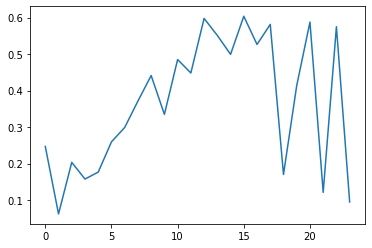

In [6]:
plt.plot(res18['rel_eff_rank'])

In [5]:
utils.play_alert() 

testing res18 initialization 1/10
    starting test 1 out of 2
    starting test 2 out of 2
[0.17479312 0.06012251 0.32438398 0.15974883 0.28242272 0.2597642
 0.22963405 0.40903401 0.44535726 0.33860561 0.46366151 0.45822147
 0.50561743 0.44750335 0.3783136  0.4960725  0.40550923 0.45904737
 0.15396768 0.30904356 0.48801107 0.11656596 0.44776709 0.09403004]


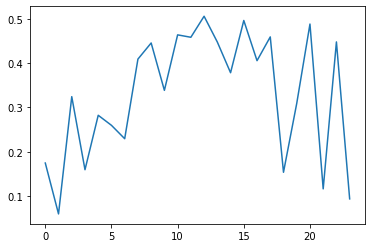

testing res18 initialization 2/10
    starting test 1 out of 2
    starting test 2 out of 2
[0.27449932 0.07580305 0.16416146 0.05363551 0.12874292 0.20672971
 0.15532642 0.3968338  0.45928679 0.36798962 0.53477787 0.53923132
 0.6412917  0.55922189 0.49984348 0.63985333 0.55519362 0.60244491
 0.18077876 0.43153393 0.61071861 0.12659437 0.57287547 0.10338219]


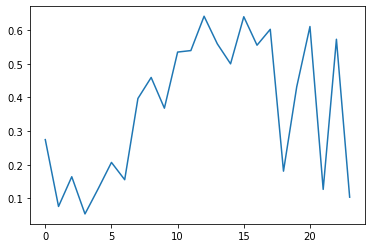

testing res18 initialization 3/10
    starting test 1 out of 2
    starting test 2 out of 2
[0.22493302 0.08559696 0.14926999 0.18372179 0.42418355 0.22439698
 0.19574185 0.3471214  0.45183139 0.31031921 0.41672769 0.47335021
 0.58573272 0.55613506 0.50677824 0.59180843 0.54262381 0.59595445
 0.18039397 0.42952472 0.62042086 0.12761091 0.5924085  0.10073073]


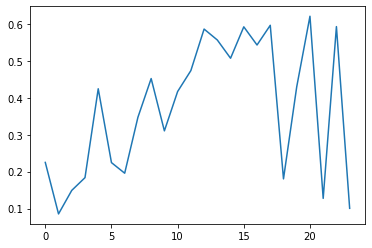

testing res18 initialization 4/10
    starting test 1 out of 2
    starting test 2 out of 2
[0.14458625 0.08950273 0.08714064 0.05076212 0.12950056 0.09782255
 0.09799107 0.30276441 0.44196701 0.30794548 0.46145966 0.50897495
 0.55965045 0.5472813  0.49228384 0.59945487 0.54464497 0.55836107
 0.17100506 0.39028799 0.57643774 0.1219213  0.54093895 0.09811619]


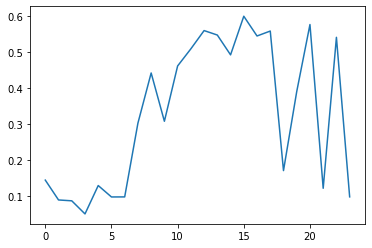

testing res18 initialization 5/10
    starting test 1 out of 2
    starting test 2 out of 2
[0.17675173 0.15556799 0.06509451 0.07405841 0.18060015 0.11985465
 0.12139399 0.2991034  0.37912887 0.29255171 0.41933564 0.4760465
 0.48604117 0.49207583 0.4344906  0.57276825 0.49633147 0.51052889
 0.15612781 0.37156116 0.54371616 0.10604201 0.50014261 0.08301396]


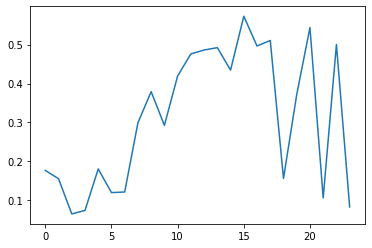

testing res18 initialization 6/10
    starting test 1 out of 2
    starting test 2 out of 2
[0.18454832 0.11066679 0.27771448 0.13018661 0.32591517 0.16718766
 0.12355101 0.38793192 0.46250673 0.35317285 0.48304475 0.48523927
 0.5409179  0.49420049 0.44529779 0.57549965 0.48129619 0.51837192
 0.1731736  0.36949658 0.53137936 0.12555205 0.49825986 0.09897195]


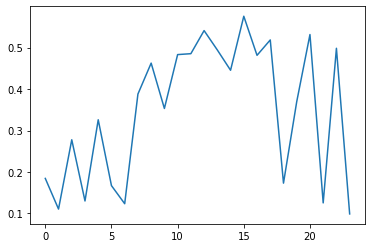

testing res18 initialization 7/10
    starting test 1 out of 2
    starting test 2 out of 2
[0.35011746 0.12089543 0.0707873  0.10101184 0.23221094 0.17690924
 0.25290935 0.31282976 0.44210568 0.32844086 0.45708448 0.49191959
 0.58136642 0.56555624 0.50756088 0.58648124 0.52299518 0.56965255
 0.1837553  0.42263615 0.5760389  0.13134249 0.54177577 0.1051975 ]


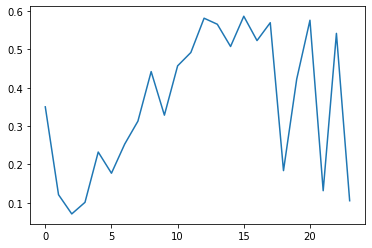

testing res18 initialization 8/10
    starting test 1 out of 2
    starting test 2 out of 2
[0.1991821  0.06570874 0.08771438 0.05349307 0.13444651 0.15815748
 0.15290218 0.27067554 0.40797243 0.27819273 0.41349104 0.45167262
 0.4998534  0.49309394 0.43671994 0.55278127 0.48781205 0.50965676
 0.1612637  0.37313031 0.55479091 0.11243506 0.49970882 0.0923474 ]


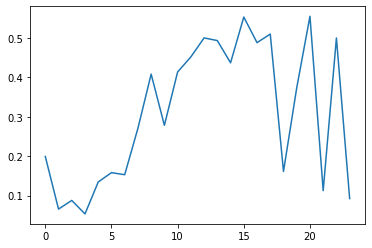

testing res18 initialization 9/10
    starting test 1 out of 2
    starting test 2 out of 2
[0.19863757 0.07927068 0.28776714 0.13916163 0.28583394 0.25030919
 0.17446072 0.50282068 0.49252557 0.39993515 0.55670401 0.4744271
 0.63849057 0.59571127 0.51834046 0.66077524 0.55932375 0.64353017
 0.17708241 0.46873137 0.65231934 0.12864698 0.61005741 0.10095282]


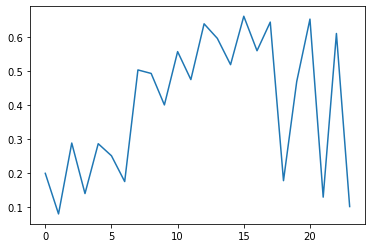

testing res18 initialization 10/10
    starting test 1 out of 2
    starting test 2 out of 2
[0.26948699 0.05598846 0.29332641 0.17703314 0.27767655 0.23610855
 0.2107896  0.42387773 0.46192559 0.31744953 0.50490598 0.49561807
 0.62394211 0.59135598 0.50863611 0.65587304 0.57433322 0.61779977
 0.17305386 0.42752023 0.64780401 0.12153353 0.6089364  0.09647055]


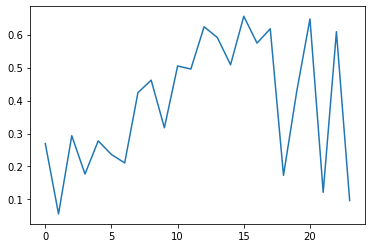

In [3]:
res18 = dict()
for i in range(10):
    print(f'testing res18 initialization {i+1}/10')
    res18[f'trial {i}'] = dict()
    lossf = nn.NLLLoss()

    hidden_layers = [3] +  [64]*2 + [128]*2 + [256]*2 + [512]*3
    res18[f'trial {i}']['model'] = LN.BlockNet(3, hidden_layers, 10, block_type=LN.ResBlock, objective_func=nn.LogSoftmax(dim=1))
    #res18[i]['optim'] = torch.optim.Adam(res18[i]['model'].parameters())
    
    if i == 0:
        res18[f'trial {i}']['rel_eff_rank'], res18['norm_c'] = relative_effective_rank(res18[f'trial {i}']['model'], train_loader, lossf,
                                                                            return_normalizing_constant=True, n_ave=2, 
                                                                            which_layers='all', wrt_input=True)
    else:
        res18[f'trial {i}']['rel_eff_rank'] = relative_effective_rank(res18[f'trial {i}']['model'], train_loader, lossf,
                                             normalizing_constants=res18['norm_c'],
                                             return_normalizing_constant=False, n_ave=2, 
                                             which_layers='all', wrt_input=True)
    print(res18[f'trial {i}']['rel_eff_rank']) 
    plt.plot(res18[f'trial {i}']['rel_eff_rank'])
    plt.show()

torch.save(res18, 'preliminary_test_res18.mf')
utils.play_alert()

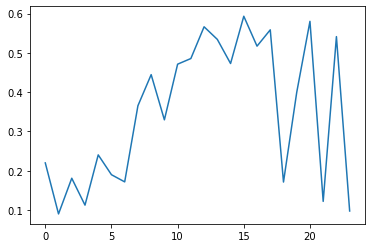

In [6]:
RERanks = np.zeros(len(res18['trial 0']['rel_eff_rank']))
for i in range(10):
    RERanks += res18[f'trial {i}']['rel_eff_rank']/10
    
plt.plot(RERanks)

In [19]:
print(res18['trial 1'])

[0.18620374 0.08359662 0.20686199 0.11378966 0.26625156 0.21536832
 0.16146446 0.39292085 0.50242637 0.37028647 0.48326937 0.45046883
 0.6089642  0.57468723 0.47819459 0.63493876 0.56070236 0.58971011
 0.17629868 0.40854132 0.61156673 0.12421368 0.5672382  0.09726189]


testing initialization 1/10
    starting test 1 out of 2
    starting test 2 out of 2
[0.07677205 0.08363313 0.07921132 0.03951374 0.18735497 0.02925167
 0.03189581 0.03256686 0.03093171 0.03776504 0.024142   0.02923171
 0.02937558 0.02849829 0.03276456 0.02871508 0.02786166 0.02720409
 0.02589579 0.02843387 0.02544134 0.02525094 0.02437566 0.02596431]


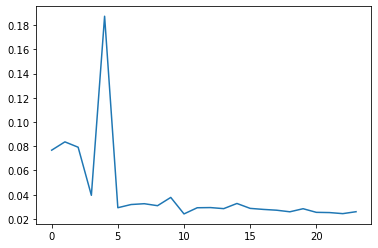

testing initialization 2/10
    starting test 1 out of 2
    starting test 2 out of 2
[0.07151858 0.06694236 0.08804231 0.04062575 0.22721765 0.02303538
 0.02563312 0.03373909 0.03316321 0.04118594 0.02661515 0.02715475
 0.02852748 0.02924163 0.03347354 0.02489456 0.0285951  0.02928365
 0.02761812 0.03019788 0.02877325 0.02808564 0.0266909  0.02721798]


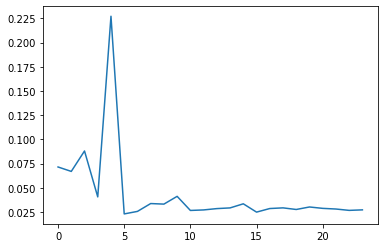

testing initialization 3/10
    starting test 1 out of 2
    starting test 2 out of 2
[0.08246473 0.07517616 0.07851236 0.04684076 0.19621862 0.04079189
 0.03747577 0.04007856 0.03383427 0.04235135 0.03435346 0.03103298
 0.03479663 0.03183302 0.03570929 0.02313747 0.02658119 0.03060146
 0.02818828 0.03057241 0.02656195 0.02594579 0.02894982 0.02573929]


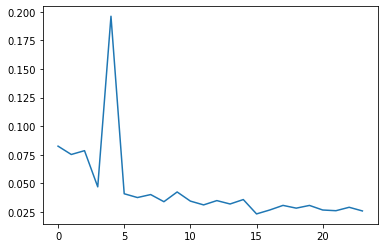

testing initialization 4/10
    starting test 1 out of 2
    starting test 2 out of 2
[0.07566343 0.07926266 0.06151954 0.04152911 0.13381258 0.02781459
 0.0253824  0.03235791 0.03243071 0.04158979 0.03004746 0.03243429
 0.03598281 0.03254856 0.03686634 0.0298515  0.02934311 0.02837862
 0.02709687 0.02834916 0.02644293 0.02652812 0.02483422 0.02511811]


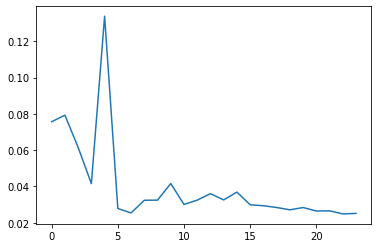

testing initialization 5/10
    starting test 1 out of 2
    starting test 2 out of 2
[0.08360532 0.08427273 0.04253515 0.03463794 0.11145551 0.03054367
 0.02876947 0.03812583 0.03269898 0.04340457 0.03923455 0.03374969
 0.0356433  0.03256729 0.03652657 0.03250161 0.03123964 0.03359658
 0.03083364 0.03375706 0.031426   0.0294725  0.02945137 0.02883656]


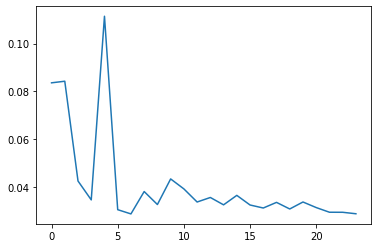

testing initialization 6/10
    starting test 1 out of 2
    starting test 2 out of 2
[0.0691716  0.05671901 0.08633312 0.03682909 0.19663629 0.02643703
 0.02812969 0.02911984 0.02969688 0.03854392 0.02780402 0.02885275
 0.02968051 0.02636543 0.02904727 0.0250339  0.02524634 0.02714972
 0.02771643 0.02964615 0.02621092 0.0280768  0.02796287 0.02783083]


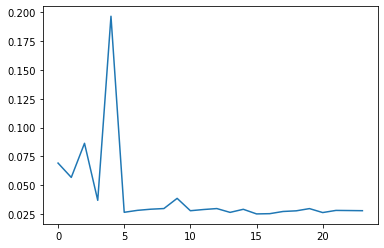

testing initialization 7/10
    starting test 1 out of 2
    starting test 2 out of 2
[0.08478819 0.07437361 0.06121446 0.04567154 0.176676   0.03498558
 0.0414169  0.03842748 0.03515876 0.04507036 0.03684468 0.03349822
 0.03697378 0.03148083 0.03615067 0.02983012 0.03080706 0.03197632
 0.02998684 0.03254728 0.02773236 0.02927108 0.03011179 0.02894903]


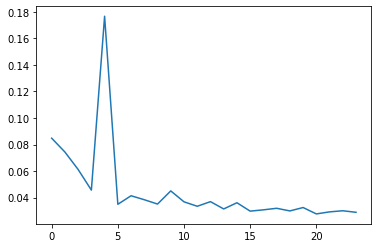

testing initialization 8/10
    starting test 1 out of 2
    starting test 2 out of 2
[0.07887566 0.07791629 0.0760513  0.04516883 0.19447525 0.03056118
 0.03307753 0.02894552 0.02870949 0.03882127 0.0337447  0.0266787
 0.03191912 0.03087163 0.03592768 0.02258723 0.02700848 0.02755313
 0.02705821 0.02871855 0.02564648 0.0263127  0.02399104 0.02648281]


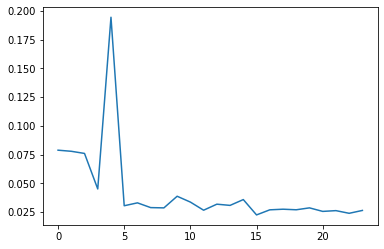

testing initialization 9/10
    starting test 1 out of 2
    starting test 2 out of 2
[0.07240218 0.08011976 0.04917047 0.03001568 0.12913424 0.02349615
 0.02225418 0.02333823 0.02436606 0.03045556 0.02215188 0.02609718
 0.03023743 0.02891298 0.03149242 0.02461997 0.02878552 0.02925927
 0.029172   0.03104713 0.03136143 0.0292601  0.02747975 0.02763854]


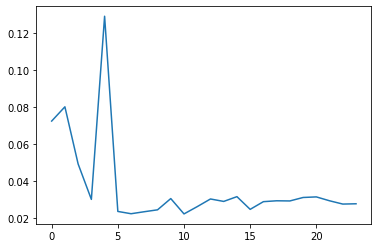

testing initialization 10/10
    starting test 1 out of 2
    starting test 2 out of 2
[0.07093881 0.09104099 0.07428905 0.03693653 0.17182768 0.0249822
 0.02693045 0.03282235 0.02665982 0.03162866 0.02493369 0.02538272
 0.02550734 0.02711109 0.02943314 0.02447596 0.02567727 0.02645866
 0.02756761 0.02956162 0.02568962 0.02759761 0.02587358 0.02780029]


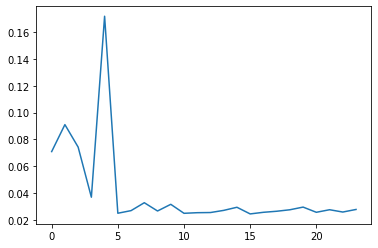

In [5]:
file_loc = 'RERank_tests/res18_noBN'

hidden_layers = [3] +  [64]*2 + [128]*2 + [256]*2 + [512]*3
model_initializer = lambda: LN.BlockNet(3, hidden_layers, 10, block_type=LN.ResBlock, objective_func=nn.LogSoftmax(dim=1),
                                       batch_norm=False)

linear25_complete = fullRERankTest(train_loader, model_initializer, nn.CrossEntropyLoss, file_loc=file_loc)

In [6]:
losses_train, losses_test, accuracy, per_class_accuracy = [], [], [], []
optimizer = res18['optim']
loss_func = res18['lossf']

res18['model'], losses_train, losses_test, accuracy, per_class_accuracy = utils.train(res18['model'], 
                                                                      train_loader, test_loader, optimizer, loss_func, num_classes=10,
                                                                      losses_train=[], losses_test=[], accuracy=[], per_class_accuracy=[], 
                                                                      weight=None, epochs=1, batch_size=500, label_smoothing=False,
                                                                      graph_skip=5, tqdm_bool=True, plot_every=None)

epoch: 1, averaged loss: 1.083, accuracy: 54.06%: 100%|██████████| 782/782 [02:56<00:00,  4.42it/s]


In [8]:
res18['rel_eff_rank']= relative_effective_rank(res18['model'], train_loader, res18['lossf'],
                                               normalizing_constant=res18['norm_c'])
print(res18['rel_eff_rank'])

0.014379731934285957


## Conv Model Test

Test gradient statistics to figure out why this one doesn't converge.

In [5]:
conv18 = dict()
conv18['lossf'] = nn.NLLLoss() #nn.CrossEntropyLoss()
conv18['filename'] = '/models/conv18.pt'

hidden_layers = [3] +  [64]*2 + [128]*2 + [256]*2 + [512]*3
conv18['model'] = LN.BlockNet(3, hidden_layers, 10, block_type=LN.ConvBlock, objective_func=nn.LogSoftmax(dim=1))
conv18['optim'] = torch.optim.Adam(conv18['model'].parameters())

In [6]:
conv18['rel_eff_rank'], conv18['norm_c'] = relative_effective_rank(conv18['model'], train_loader, conv18['lossf'],
                                               return_normalizing_constant=True)
print(conv18['rel_eff_rank'])

(3072, 256)
0.08739618398051438


In [11]:
losses_train, losses_test, accuracy, per_class_accuracy = [], [], [], []
optimizer = conv18['optim']
loss_func = conv18['lossf']

conv18['model'], losses_train, losses_test, accuracy, per_class_accuracy = utils.train(conv18['model'], 
                                                                      train_loader, test_loader, optimizer, loss_func, num_classes=10,
                                                                      losses_train=[], losses_test=[], accuracy=[], per_class_accuracy=[], 
                                                                      weight=None, epochs=1, batch_size=500, label_smoothing=False,
                                                                      graph_skip=5, tqdm_bool=True, plot_every=None, starting_epoch=1)

epoch: 1, averaged loss: 1.520, accuracy: 29.37%: 100%|██████████| 782/782 [02:41<00:00,  4.83it/s]


In [12]:
conv18['rel_eff_rank'] = relative_effective_rank(conv18['model'], train_loader, conv18['lossf'],
                                               normalizing_constant=conv18['norm_c'])
print(conv18['rel_eff_rank'])

0.009867938325028906


## DenseNet

In [5]:
densenet13 = LN.DenseNet(in_channels=3, start_channels=12, output_classes=100, n_per_block=2, nblocks=4, growthRate=4, bottleneck=False,
              reduce_constant=.6, kernel_size_avg_pool=2, padding_avg_pool=0, pooling=False)

## Linear Model Test

In [7]:
linear5 = dict()
linear5['lossf'] = nn.CrossEntropyLoss()
linear5['filename'] = '/models/linear5.pt'


in_layers = 3*32*32
hidden_layers = [1500, 500, 100]
linear5['model'] = LN.LinearNet(in_layers, hidden_layers, 10, 
                                outf=nn.LogSoftmax(dim=1),
                                activationClass=LN.CReLU,
                                layerClass=LN.LinearHettingerInit,
                                batchnorm=False)
linear5['optim'] = torch.optim.Adam(linear5['model'].parameters())

In [8]:
linear5['rel_eff_rank'], linear5['norm_c'] = relative_effective_rank(linear5['model'], train_loader, linear5['lossf'],
                                               return_normalizing_constant=True)
print(linear5['rel_eff_rank'])

(3072, 256)
0.03350936916754779


In [ ]:
file_loc = 'RERank_tests/'


In [15]:
losses_train, losses_test, accuracy, per_class_accuracy = [], [], [], []
optimizer = linear5['optim']
loss_func = linear5['lossf']


linear5['model'], losses_train, losses_test, accuracy, per_class_accuracy = utils.train(linear5['model'], 
                                                                      train_loader, test_loader, optimizer, loss_func, num_classes=10,
                                                                      losses_train=[], losses_test=[], accuracy=[], per_class_accuracy=[], 
                                                                      weight=None, epochs=1, batch_size=500, label_smoothing=False,
                                                                      graph_skip=5, tqdm_bool=True, plot_every=None)

epoch: 1, averaged loss: 2.114, accuracy: 28.75%: 100%|██████████| 782/782 [00:12<00:00, 63.44it/s]


In [16]:
linear5['rel_eff_rank'] = relative_effective_rank(linear5['model'], train_loader, linear5['lossf'],
                                               normalizing_constant=linear5['norm_c'])
print(linear5['rel_eff_rank'])

0.009204532950322255


## Small Conv Model Test

In [16]:
conv5 = dict()
conv5['lossf'] = nn.NLLLoss()
conv5['filename'] = '/models/conv5.pt'

hidden_layers = [3] +  [64]*2 + [128]*2
conv5['model'] = LN.BlockNet(3, hidden_layers, 10, block_type=LN.ConvBlock, objective_func=nn.LogSoftmax(dim=1))
conv5['optim'] = torch.optim.Adam(conv5['model'].parameters())

In [17]:
conv5['rel_eff_rank'], conv5['norm_c'] = relative_effective_rank(conv5['model'], train_loader, conv5['lossf'],
                                               return_normalizing_constant=True)
print(conv5['rel_eff_rank'])

256 3072
0.15285225835731236


In [19]:
losses_train, losses_test, accuracy, per_class_accuracy = [], [], [], []
optimizer = conv5['optim']
loss_func = conv5['lossf']

conv18['model'], losses_train, losses_test, accuracy, per_class_accuracy = utils.train(conv5['model'], 
                                                                      train_loader, test_loader, optimizer, loss_func, num_classes=10,
                                                                      losses_train=[], losses_test=[], accuracy=[], per_class_accuracy=[], 
                                                                      weight=None, epochs=1, batch_size=500, label_smoothing=False,
                                                                      graph_skip=5, tqdm_bool=True, plot_every=None)

epoch: 1, averaged loss: 1.033, accuracy: 50.63%: 100%|██████████| 782/782 [00:24<00:00, 31.38it/s]


In [20]:
conv5['rel_eff_rank']= relative_effective_rank(conv5['model'], train_loader, conv5['lossf'],
                                               normalizing_constant=conv5['norm_c'])
print(conv5['rel_eff_rank'])

0.007104803827711936


## Deep LL-init

In [14]:
linear25 = dict()
linear25['lossf'] = nn.CrossEntropyLoss()
linear25['filename'] = '/models/linear25.pt'


in_layers = 3*32*32
hidden_layers = np.logspace(3.17, 1.2, 23).astype(int)
linear25['model'] = LN.LinearNet(in_layers, hidden_layers, 10, 
                                outf=nn.LogSoftmax(dim=1),
                                activationClass=LN.CReLU,
                                layerClass=LN.LinearHettingerInit,
                                batchnorm=False)
linear25['optim'] = torch.optim.Adam(linear25['model'].parameters())

In [15]:
linear25['rel_eff_rank'], linear25['norm_c'] = relative_effective_rank(linear25['model'], train_loader, linear25['lossf'],
                                               return_normalizing_constant=True)
print(linear25['rel_eff_rank'])

256 3072
0.009032607024920997


testing initialization 1/10
    starting test 1 out of 2
    starting test 2 out of 2
[0.00885339 0.01517391 0.01381279 0.01401344 0.01403963 0.01397113
 0.01410992 0.01442421 0.01496783 0.01469416 0.01499361 0.01564083
 0.01629277 0.01749637 0.01688564 0.01724546 0.01788911 0.01778847
 0.02470388 0.02555706 0.03261539 0.03724852 0.04682838 0.06980908
 0.14700936]


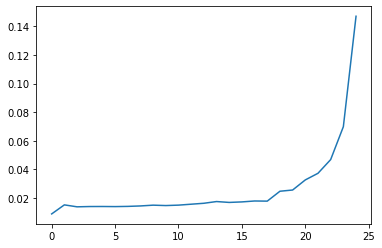

testing initialization 2/10
    starting test 1 out of 2
    starting test 2 out of 2
[0.01256974 0.02670082 0.02072478 0.0203402  0.02052829 0.02045521
 0.02116132 0.02146345 0.02110197 0.02078672 0.0214935  0.01957241
 0.02153332 0.0214614  0.0210481  0.01916352 0.02000504 0.02178715
 0.02160379 0.02794439 0.03477206 0.03659884 0.04853683 0.06286108
 0.14163117]


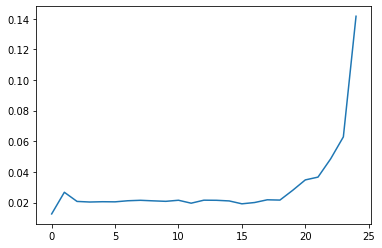

testing initialization 3/10
    starting test 1 out of 2
    starting test 2 out of 2
[0.01313823 0.02536777 0.02090655 0.02095772 0.02043745 0.01961719
 0.0199118  0.02019735 0.01950133 0.01969547 0.02067715 0.02129004
 0.02074148 0.02057447 0.02176215 0.02174047 0.02370615 0.02490084
 0.02631208 0.03392227 0.03408363 0.03896552 0.05746165 0.07401125
 0.13258266]


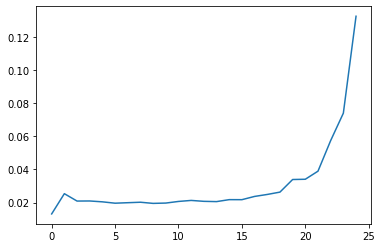

testing initialization 4/10
    starting test 1 out of 2
    starting test 2 out of 2
[0.01157002 0.02126426 0.01822214 0.0177697  0.0168413  0.01725558
 0.0184324  0.0175715  0.01820609 0.0175382  0.01803438 0.02015941
 0.0191764  0.02053091 0.01874411 0.0197823  0.0194853  0.0219217
 0.02526515 0.02541501 0.03099607 0.04185603 0.05535898 0.07740378
 0.1107048 ]


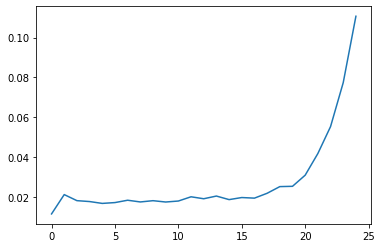

testing initialization 5/10
    starting test 1 out of 2
    starting test 2 out of 2
[0.01524689 0.02559078 0.02213887 0.02219804 0.02193165 0.02238529
 0.02325092 0.02204468 0.02329991 0.02383796 0.02449787 0.02330539
 0.02203939 0.02230349 0.0229206  0.02769001 0.03197483 0.03766592
 0.03275394 0.03161268 0.03991933 0.03935334 0.05458451 0.09109744
 0.17904044]


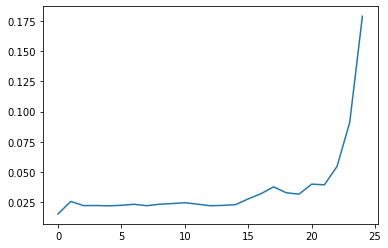

testing initialization 6/10
    starting test 1 out of 2
    starting test 2 out of 2
[0.00968963 0.01997111 0.01543585 0.01546828 0.01562952 0.01572482
 0.0158501  0.01632999 0.01670414 0.01693661 0.01777913 0.01889921
 0.01871739 0.02099451 0.02067328 0.01994921 0.02146226 0.02437744
 0.03161966 0.03931392 0.03465101 0.04492206 0.05595972 0.07489809
 0.13675596]


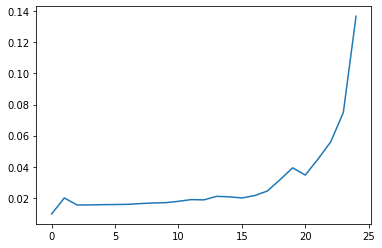

testing initialization 7/10
    starting test 1 out of 2
    starting test 2 out of 2
[0.01059298 0.02552172 0.01768858 0.01789691 0.01758337 0.01791954
 0.01755959 0.01802561 0.0171975  0.01657963 0.01645416 0.01764577
 0.01990185 0.01730785 0.01868436 0.02077193 0.02262533 0.03078903
 0.03282745 0.03426372 0.0361817  0.04540192 0.05415546 0.07305559
 0.15974079]


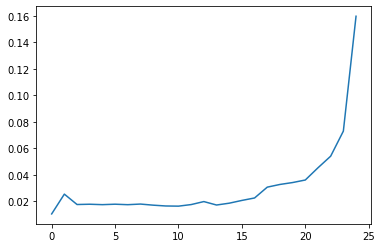

testing initialization 8/10
    starting test 1 out of 2
    starting test 2 out of 2
[0.00947467 0.02065385 0.01497457 0.01505448 0.01532353 0.01505097
 0.01507529 0.01603712 0.01671351 0.01701642 0.01837903 0.01699295
 0.01639633 0.0161239  0.0170513  0.01789237 0.0176174  0.02132206
 0.02344545 0.02665396 0.03275169 0.03029342 0.03894327 0.05831899
 0.12993553]


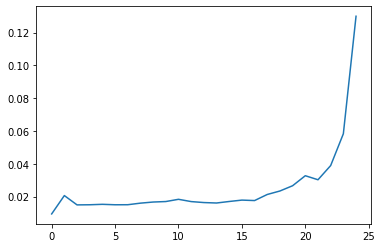

testing initialization 9/10
    starting test 1 out of 2
    starting test 2 out of 2
[0.00776464 0.0193316  0.01218797 0.01223372 0.01208944 0.01186016
 0.01162874 0.01172704 0.01182506 0.01182981 0.01225475 0.01253142
 0.01252618 0.01289981 0.01375004 0.01514769 0.01676154 0.01749955
 0.01987954 0.02272141 0.02771833 0.03129093 0.03207625 0.04433497
 0.07479069]


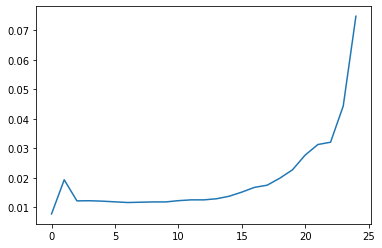

testing initialization 10/10
    starting test 1 out of 2
    starting test 2 out of 2
[0.01024782 0.02493328 0.0170174  0.01681956 0.01696877 0.01675164
 0.01612919 0.01620003 0.01679197 0.01680607 0.01666961 0.01791254
 0.01891898 0.01917235 0.0200066  0.02208746 0.02285394 0.02696182
 0.03064395 0.03225901 0.03287207 0.03531919 0.05054888 0.06759453
 0.09653579]


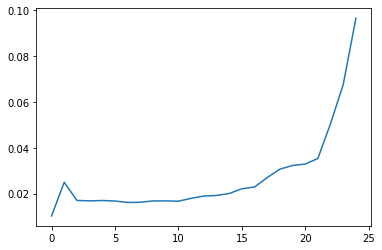

In [12]:
file_loc = 'RERank_tests/linear25'

in_layers = 3*32*32
hidden_layers = np.logspace(3.17, 1.2, 23).astype(int)
model_initializer = lambda: LN.LinearNet(in_layers, hidden_layers, 10, 
                                outf=nn.LogSoftmax(dim=1),
                                activationClass=LN.CReLU,
                                layerClass=LN.LinearHettingerInit,
                                batchnorm=False)

linear25_complete = fullRERankTest(train_loader, model_initializer, nn.CrossEntropyLoss, file_loc=file_loc)

epoch: 9, averaged loss: 1.411, accuracy: 38.56%: 100%|██████████| 782/782 [00:21<00:00, 36.25it/s]
epoch: 10, averaged loss: 1.332, accuracy: 42.28%: 100%|██████████| 782/782 [00:21<00:00, 36.26it/s]


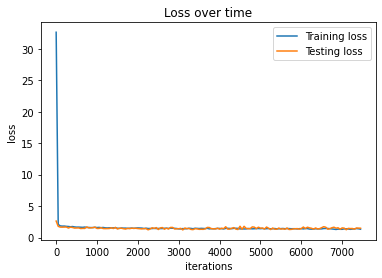

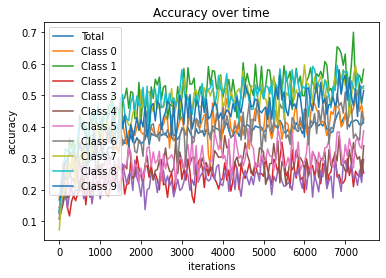

epoch: 11, averaged loss: 2.367, accuracy: 20.31%: 100%|██████████| 782/782 [00:21<00:00, 36.07it/s]    
epoch: 12, averaged loss: 1.910, accuracy: 27.16%: 100%|██████████| 782/782 [00:21<00:00, 36.13it/s]
epoch: 13, averaged loss: 1.669, accuracy: 33.22%: 100%|██████████| 782/782 [00:21<00:00, 36.16it/s]
epoch: 14, averaged loss: 1.577, accuracy: 34.41%: 100%|██████████| 782/782 [00:21<00:00, 36.20it/s]
epoch: 15, averaged loss: 1.428, accuracy: 38.28%: 100%|██████████| 782/782 [00:21<00:00, 36.17it/s]
epoch: 16, averaged loss: 1.285, accuracy: 44.37%: 100%|██████████| 782/782 [00:21<00:00, 36.15it/s]
epoch: 17, averaged loss: 1.276, accuracy: 46.00%: 100%|██████████| 782/782 [00:21<00:00, 36.19it/s]
epoch: 18, averaged loss: 1.142, accuracy: 49.59%: 100%|██████████| 782/782 [00:21<00:00, 36.14it/s]
epoch: 19, averaged loss: 1.015, accuracy: 53.94%: 100%|██████████| 782/782 [00:21<00:00, 35.97it/s]
epoch: 20, averaged loss: 1.031, accuracy: 55.50%: 100%|██████████| 782/782 [00:21<00:0

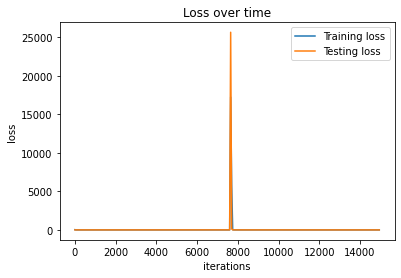

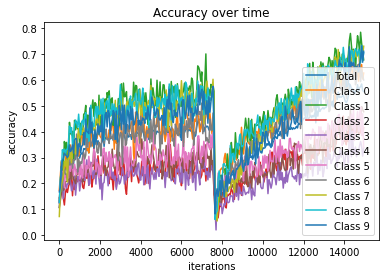

epoch: 21, averaged loss: 1.009, accuracy: 56.41%: 100%|██████████| 782/782 [00:21<00:00, 36.13it/s]
epoch: 22, averaged loss: 0.938, accuracy: 56.88%: 100%|██████████| 782/782 [00:21<00:00, 36.10it/s]
epoch: 23, averaged loss: 0.991, accuracy: 58.56%: 100%|██████████| 782/782 [00:21<00:00, 36.13it/s]
epoch: 24, averaged loss: 0.942, accuracy: 57.91%: 100%|██████████| 782/782 [00:21<00:00, 36.17it/s]
epoch: 25, averaged loss: 0.975, accuracy: 57.44%: 100%|██████████| 782/782 [00:21<00:00, 36.09it/s]
epoch: 26, averaged loss: 1.028, accuracy: 54.94%: 100%|██████████| 782/782 [00:21<00:00, 36.14it/s]
epoch: 27, averaged loss: 0.980, accuracy: 56.38%: 100%|██████████| 782/782 [00:21<00:00, 36.19it/s]
epoch: 28, averaged loss: 1.019, accuracy: 55.56%: 100%|██████████| 782/782 [00:21<00:00, 36.17it/s]
epoch: 29, averaged loss: 1.032, accuracy: 55.03%: 100%|██████████| 782/782 [00:21<00:00, 36.06it/s]
epoch: 30, averaged loss: 1.057, accuracy: 52.66%: 100%|██████████| 782/782 [00:21<00:00, 3

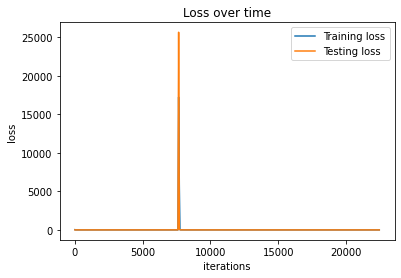

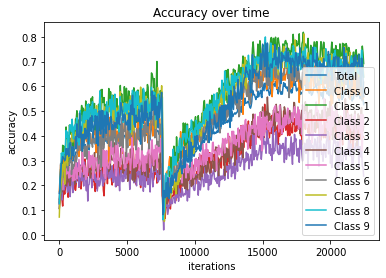

epoch: 31, averaged loss: 1.063, accuracy: 52.69%: 100%|██████████| 782/782 [00:21<00:00, 36.06it/s]
epoch: 32, averaged loss: 1.105, accuracy: 53.37%: 100%|██████████| 782/782 [00:21<00:00, 36.19it/s]
epoch: 33, averaged loss: 1.039, accuracy: 54.94%: 100%|██████████| 782/782 [00:21<00:00, 36.18it/s]
epoch: 34, averaged loss: 2.710, accuracy: 22.94%: 100%|██████████| 782/782 [00:21<00:00, 36.17it/s]    
epoch: 35, averaged loss: 1.819, accuracy: 30.91%: 100%|██████████| 782/782 [00:21<00:00, 36.20it/s]
epoch: 36, averaged loss: 1.712, accuracy: 34.87%: 100%|██████████| 782/782 [00:21<00:00, 36.10it/s]
epoch: 37, averaged loss: 1.435, accuracy: 40.97%: 100%|██████████| 782/782 [00:21<00:00, 36.22it/s]
epoch: 38, averaged loss: 1.255, accuracy: 47.66%: 100%|██████████| 782/782 [00:21<00:00, 36.12it/s]
epoch: 39, averaged loss: 1.184, accuracy: 51.72%: 100%|██████████| 782/782 [00:21<00:00, 36.22it/s]
epoch: 40, averaged loss: 0.963, accuracy: 56.66%: 100%|██████████| 782/782 [00:21<00:0

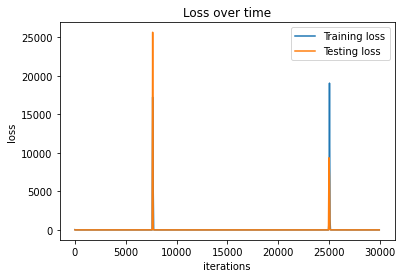

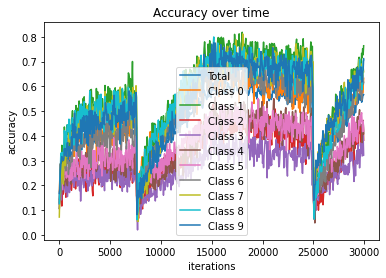

epoch: 41, averaged loss: 0.925, accuracy: 60.62%: 100%|██████████| 782/782 [00:21<00:00, 36.10it/s]
epoch: 42, averaged loss: 0.758, accuracy: 66.78%: 100%|██████████| 782/782 [00:21<00:00, 36.13it/s]
epoch: 43, averaged loss: 0.750, accuracy: 68.41%: 100%|██████████| 782/782 [00:21<00:00, 36.25it/s]
epoch: 44, averaged loss: 0.624, accuracy: 72.59%: 100%|██████████| 782/782 [00:21<00:00, 36.16it/s]
epoch: 45, averaged loss: 0.636, accuracy: 72.78%: 100%|██████████| 782/782 [00:21<00:00, 36.20it/s]
epoch: 46, averaged loss: 0.671, accuracy: 71.16%: 100%|██████████| 782/782 [00:21<00:00, 36.13it/s]
epoch: 47, averaged loss: 0.678, accuracy: 71.81%: 100%|██████████| 782/782 [00:21<00:00, 36.03it/s]
epoch: 48, averaged loss: 0.714, accuracy: 70.88%: 100%|██████████| 782/782 [00:21<00:00, 35.92it/s]
epoch: 49, averaged loss: 0.831, accuracy: 66.47%: 100%|██████████| 782/782 [00:21<00:00, 36.12it/s]
epoch: 50, averaged loss: 0.770, accuracy: 68.19%: 100%|██████████| 782/782 [00:21<00:00, 3

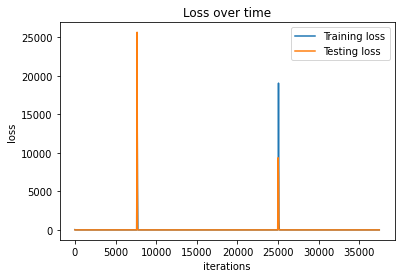

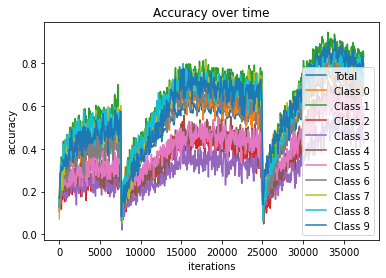

In [13]:
losses_train, losses_test, accuracy, per_class_accuracy = [], [], [], []
optimizer = linear25['optim']
loss_func = linear25['lossf']


linear25['model'], losses_train, losses_test, accuracy, per_class_accuracy = utils.train(linear25['model'], 
                                                                      train_loader, test_loader, optimizer, loss_func, num_classes=10,
                                                                      losses_train=[], losses_test=[], accuracy=[], per_class_accuracy=[], 
                                                                      weight=None, epochs=50, batch_size=500, label_smoothing=False,
                                                                      graph_skip=50, tqdm_bool=True, plot_every=10)

## Deep LL-init 50 with BatchNorm

In [3]:
reload(LN)

linear50 = dict()
linear50['lossf'] = nn.CrossEntropyLoss()
linear50['filename'] = '/models/linear50.pt'


in_layers = 3*32*32
hidden_layers = np.logspace(3.17, 1.2, 48).astype(int)
linear50['model'] = LN.LinearNet(in_layers, hidden_layers, 10, 
                                outf=nn.LogSoftmax(dim=1),
                                activationClass=LN.CReLU,
                                layerClass=LN.LinearHettingerInitOld,
                                batchnorm=True)
linear50['optim'] = torch.optim.Adam(linear50['model'].parameters(), weight_decay=1e-5)

# relative effective rank
linear50['rel_eff_rank'], linear50['norm_c'] = relative_effective_rank(linear50['model'], train_loader, linear50['lossf'],
                                               return_normalizing_constant=True)
print('relative effective rank:', linear50['rel_eff_rank'])

# gradient magnitudes
# magnitudes, means, stds = utils.gradient_statistics(linear50['model'], train_loader, linear50['lossf'])

# plt.plot(np.arange(len(stds)), magnitudes)
# plt.title('Gradient ||*|| by Layer')
# plt.show()

relative effective rank: 0.01850958900976739


epoch: 9, averaged loss: 1.981, accuracy: 16.28%: 100%|██████████| 782/782 [00:39<00:00, 19.70it/s]
epoch: 10, averaged loss: 1.934, accuracy: 18.16%: 100%|██████████| 782/782 [00:39<00:00, 19.69it/s]


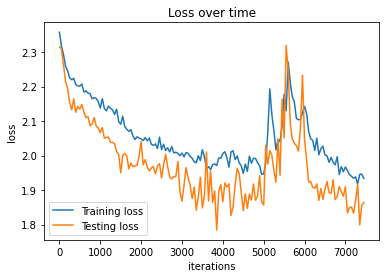

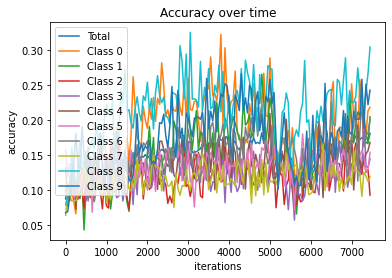

epoch: 11, averaged loss: 2.035, accuracy: 15.94%: 100%|██████████| 782/782 [00:45<00:00, 17.37it/s]
epoch: 12, averaged loss: 2.291, accuracy: 10.47%: 100%|██████████| 782/782 [00:40<00:00, 19.50it/s]
epoch: 13, averaged loss: 2.158, accuracy: 11.84%: 100%|██████████| 782/782 [00:40<00:00, 19.54it/s]
epoch: 14, averaged loss: 2.124, accuracy: 13.56%: 100%|██████████| 782/782 [00:40<00:00, 19.54it/s]
epoch: 15, averaged loss: 2.051, accuracy: 13.81%: 100%|██████████| 782/782 [00:40<00:00, 19.48it/s]
epoch: 16, averaged loss: 2.001, accuracy: 14.81%: 100%|██████████| 782/782 [00:40<00:00, 19.49it/s]
epoch: 17, averaged loss: 1.925, accuracy: 17.37%: 100%|██████████| 782/782 [00:40<00:00, 19.50it/s]
epoch: 18, averaged loss: 1.923, accuracy: 18.19%: 100%|██████████| 782/782 [00:40<00:00, 19.45it/s]
epoch: 19, averaged loss: 1.902, accuracy: 20.13%: 100%|██████████| 782/782 [00:40<00:00, 19.52it/s]
epoch: 20, averaged loss: 1.877, accuracy: 19.78%: 100%|██████████| 782/782 [00:39<00:00, 1

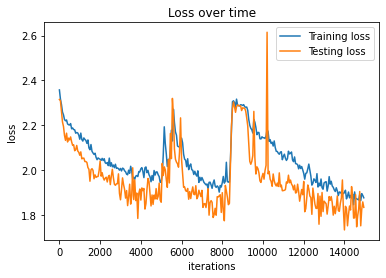

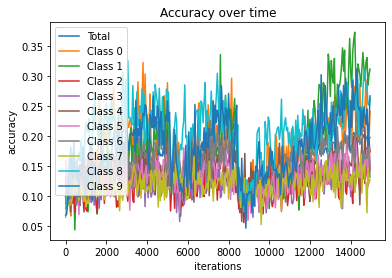

epoch: 21, averaged loss: 1.919, accuracy: 17.19%: 100%|██████████| 782/782 [00:53<00:00, 14.69it/s]
epoch: 22, averaged loss: 2.205, accuracy: 11.94%: 100%|██████████| 782/782 [00:40<00:00, 19.52it/s]
epoch: 23, averaged loss: 2.250, accuracy: 11.87%: 100%|██████████| 782/782 [00:40<00:00, 19.50it/s]
epoch: 24, averaged loss: 2.176, accuracy: 12.00%: 100%|██████████| 782/782 [00:40<00:00, 19.52it/s]
epoch: 25, averaged loss: 2.075, accuracy: 15.62%: 100%|██████████| 782/782 [00:39<00:00, 19.59it/s]
epoch: 26, averaged loss: 2.006, accuracy: 16.63%: 100%|██████████| 782/782 [00:40<00:00, 19.48it/s]
epoch: 27, averaged loss: 2.099, accuracy: 14.53%: 100%|██████████| 782/782 [00:39<00:00, 19.61it/s]
epoch: 28, averaged loss: 2.045, accuracy: 14.84%: 100%|██████████| 782/782 [00:40<00:00, 19.53it/s]
epoch: 29, averaged loss: 1.975, accuracy: 16.56%: 100%|██████████| 782/782 [00:40<00:00, 19.54it/s]
epoch: 30, averaged loss: 1.973, accuracy: 17.56%: 100%|██████████| 782/782 [00:40<00:00, 1

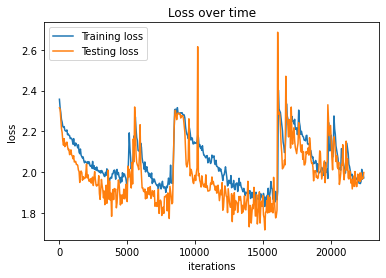

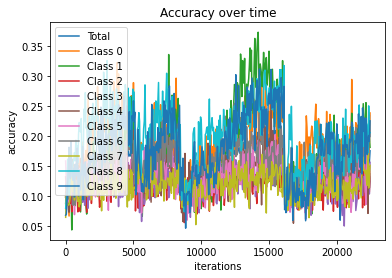

epoch: 31, averaged loss: 1.918, accuracy: 18.19%: 100%|██████████| 782/782 [00:40<00:00, 19.15it/s]
epoch: 32, averaged loss: 1.877, accuracy: 17.06%: 100%|██████████| 782/782 [00:40<00:00, 19.45it/s]
epoch: 33, averaged loss: 1.934, accuracy: 19.00%: 100%|██████████| 782/782 [00:40<00:00, 19.54it/s]
epoch: 34, averaged loss: 1.898, accuracy: 18.25%: 100%|██████████| 782/782 [00:40<00:00, 19.54it/s]
epoch: 35, averaged loss: 2.124, accuracy: 15.66%: 100%|██████████| 782/782 [00:39<00:00, 19.57it/s]
epoch: 36, averaged loss: 2.276, accuracy: 10.50%: 100%|██████████| 782/782 [00:39<00:00, 19.68it/s]
epoch: 37, averaged loss: 2.297, accuracy: 10.44%: 100%|██████████| 782/782 [00:39<00:00, 19.68it/s]
epoch: 38, averaged loss: 2.292, accuracy: 10.37%: 100%|██████████| 782/782 [00:39<00:00, 19.63it/s]
epoch: 39, averaged loss: 2.306, accuracy: 10.59%: 100%|██████████| 782/782 [00:39<00:00, 19.68it/s]
epoch: 40, averaged loss: 2.304, accuracy: 10.59%: 100%|██████████| 782/782 [00:39<00:00, 1

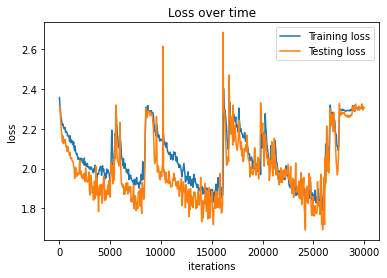

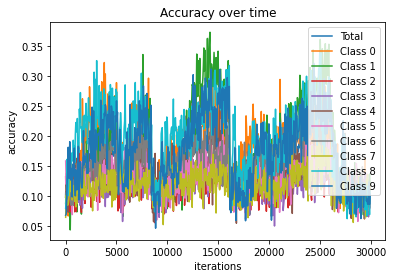

epoch: 41, averaged loss: 2.304, accuracy: 10.37%: 100%|██████████| 782/782 [00:39<00:00, 19.65it/s]
epoch: 42, averaged loss: 2.303, accuracy: 10.06%: 100%|██████████| 782/782 [00:39<00:00, 19.68it/s]
epoch: 43, averaged loss: 2.304, accuracy: 11.12%: 100%|██████████| 782/782 [00:39<00:00, 19.68it/s]
epoch: 45, averaged loss: 2.288, accuracy: 9.22%: 100%|██████████| 782/782 [00:39<00:00, 19.63it/s] 
epoch: 46, averaged loss: 2.240, accuracy: 10.69%: 100%|██████████| 782/782 [00:39<00:00, 19.65it/s]
epoch: 47, averaged loss: 2.297, accuracy: 10.00%: 100%|██████████| 782/782 [00:39<00:00, 19.63it/s]
epoch: 48, averaged loss: 2.222, accuracy: 11.72%: 100%|██████████| 782/782 [00:39<00:00, 19.71it/s]
epoch: 49, averaged loss: 2.084, accuracy: 13.41%: 100%|██████████| 782/782 [00:39<00:00, 19.68it/s]
epoch: 50, averaged loss: 1.992, accuracy: 14.22%: 100%|██████████| 782/782 [00:39<00:00, 19.65it/s]


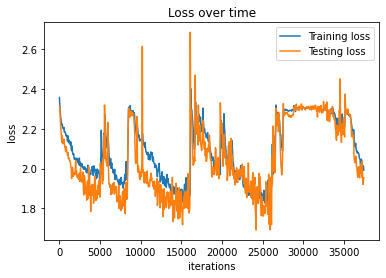

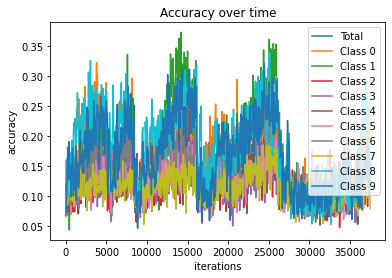

In [4]:
losses_train, losses_test, accuracy, per_class_accuracy = [], [], [], []
optimizer = linear50['optim']
loss_func = linear50['lossf']

scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, 50)

linear50['model'], losses_train, losses_test, accuracy, per_class_accuracy = utils.train(linear50['model'], 
                                                                      train_loader, test_loader, optimizer, loss_func, num_classes=10,
                                                                      losses_train=[], losses_test=[], accuracy=[], per_class_accuracy=[], 
                                                                      weight=None, epochs=50, batch_size=500, label_smoothing=False,
                                                                      graph_skip=50, tqdm_bool=True, plot_every=10)#,
                                                                    # lr_scheduler=scheduler)

## Deep LL-init 50 without BatchNorm

testing initialization 1/10
    starting test 1 out of 2
    starting test 2 out of 2
[0.09231447 0.11374822 0.06966044 0.03423603 0.02022656 0.01360187
 0.01086448 0.0091958  0.00924691 0.00863663 0.00824079 0.00878898
 0.00822353 0.00801655 0.00780016 0.00782952 0.00799199 0.00789172
 0.00762919 0.00799765 0.00758326 0.00790053 0.00784255 0.00783485
 0.0082287  0.00827046 0.00901803 0.00950289 0.00893509 0.00889362
 0.00921759 0.00989726 0.01058156 0.01155036 0.01184967 0.0114146
 0.01076481 0.01361336 0.01337206 0.01466932 0.01585456 0.01374589
 0.0126285  0.01442919 0.01657807 0.02045927 0.02708675 0.024393
 0.0476469  0.0957133 ]


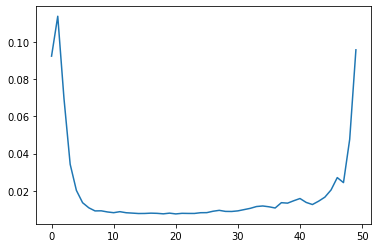

testing initialization 2/10
    starting test 1 out of 2
    starting test 2 out of 2
[0.06043144 0.09086383 0.04713295 0.02327455 0.01367584 0.00846022
 0.00616147 0.00546895 0.00518761 0.00520064 0.00533573 0.00524544
 0.00536143 0.00559381 0.00540713 0.00563217 0.00587012 0.00594495
 0.00600378 0.0061903  0.00633635 0.00642088 0.00666147 0.00692308
 0.00691809 0.00680399 0.00631947 0.00628701 0.00619586 0.00633086
 0.006835   0.00675173 0.00682235 0.0072673  0.00735587 0.00790783
 0.0077819  0.00973155 0.00904594 0.00925495 0.01032741 0.01308408
 0.01410323 0.01791561 0.01671412 0.02085434 0.02410075 0.03483755
 0.03667316 0.09504449]


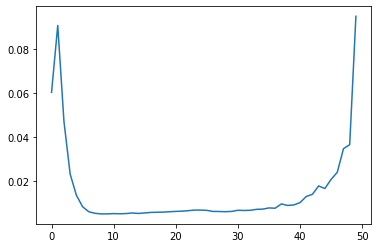

testing initialization 3/10
    starting test 1 out of 2
    starting test 2 out of 2
[0.06242823 0.08760764 0.04963721 0.02864434 0.01695415 0.01089649
 0.00827205 0.00716084 0.00707879 0.00703212 0.00686982 0.00706504
 0.00724109 0.00740563 0.00737603 0.00773897 0.00765285 0.00813326
 0.00822833 0.00793825 0.00823515 0.00776475 0.00776491 0.00749425
 0.00748587 0.00690303 0.00716278 0.00739664 0.00863166 0.00798065
 0.00721987 0.00697606 0.00699121 0.0072181  0.00865545 0.01042801
 0.00938109 0.01015524 0.01252357 0.01204101 0.01162292 0.01308895
 0.01572345 0.01864678 0.02185249 0.02590606 0.02642841 0.03066789
 0.04398417 0.09672905]


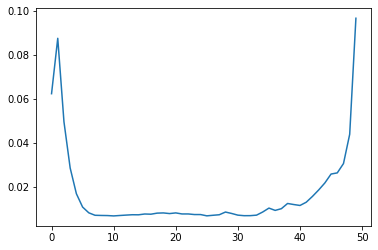

testing initialization 4/10
    starting test 1 out of 2
    starting test 2 out of 2
[0.08209104 0.11127681 0.06502808 0.03343179 0.01948718 0.01325997
 0.00959087 0.00830002 0.00792221 0.00779207 0.00798399 0.00769075
 0.00721334 0.00725306 0.00767818 0.007478   0.00767048 0.00806833
 0.0084305  0.00804712 0.00852568 0.00887145 0.00850471 0.00923385
 0.00939022 0.00965791 0.00894921 0.0081506  0.00864704 0.00818494
 0.00856086 0.00897745 0.0092858  0.01067734 0.01105932 0.01184682
 0.01160354 0.01254018 0.01298494 0.01153492 0.01235658 0.01246252
 0.01439865 0.01580289 0.01450582 0.01345812 0.01453608 0.02414488
 0.03935025 0.10312196]


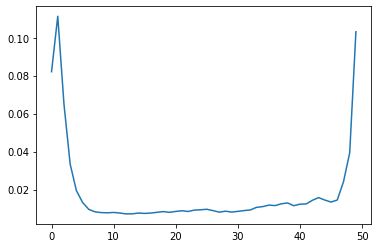

testing initialization 5/10
    starting test 1 out of 2
    starting test 2 out of 2
[0.05121721 0.08600414 0.04453473 0.02360142 0.01339111 0.00872393
 0.00640672 0.00548748 0.00526838 0.00531818 0.00524409 0.00536787
 0.00557102 0.00550479 0.00543468 0.00555361 0.00565113 0.0058655
 0.00599597 0.00625199 0.00698222 0.0072661  0.00696837 0.00695143
 0.0068584  0.00728862 0.00737523 0.00689737 0.00668563 0.00694071
 0.0069577  0.00648003 0.00655758 0.00794102 0.00821663 0.00930392
 0.00897824 0.00992133 0.0101958  0.01176109 0.0111997  0.01264234
 0.01167909 0.01277656 0.01550801 0.01831821 0.02281837 0.03253603
 0.04375038 0.09068313]


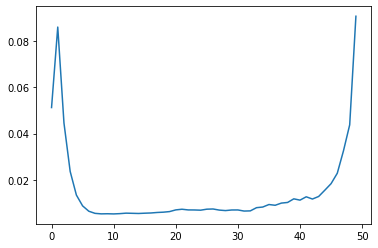

testing initialization 6/10
    starting test 1 out of 2
    starting test 2 out of 2
[0.05215142 0.08285394 0.04339275 0.02137237 0.01233363 0.00795166
 0.00582098 0.00522762 0.00513023 0.0051126  0.00514951 0.00533181
 0.00528087 0.00528665 0.00538987 0.00575422 0.00556033 0.00574165
 0.00573859 0.00568294 0.00592255 0.00582359 0.00592653 0.00613628
 0.00611856 0.00617031 0.00627809 0.00667679 0.00670395 0.00688002
 0.00669161 0.00675796 0.0073443  0.00857338 0.0087613  0.00823907
 0.00885265 0.01027648 0.01172161 0.01305875 0.01126041 0.0136353
 0.01474007 0.01482672 0.01704238 0.01555011 0.02056289 0.03101466
 0.04212052 0.09632825]


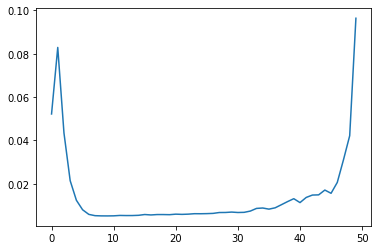

testing initialization 7/10
    starting test 1 out of 2
    starting test 2 out of 2
[0.04619462 0.06901001 0.03556367 0.01768011 0.01036968 0.00669727
 0.00497544 0.00448842 0.00433786 0.00431621 0.0042901  0.00431368
 0.00436299 0.00436225 0.00437997 0.00441161 0.00446152 0.0045127
 0.00452458 0.00456137 0.00459241 0.00464364 0.00466555 0.0047768
 0.00490201 0.00499015 0.0050218  0.00517953 0.00538808 0.00548937
 0.00568456 0.0058466  0.00620706 0.00638758 0.00668747 0.00677219
 0.00749431 0.00746279 0.00807984 0.00853313 0.00979176 0.01075633
 0.01464248 0.01521995 0.02375055 0.02426144 0.03376914 0.03338728
 0.04143604 0.0982809 ]


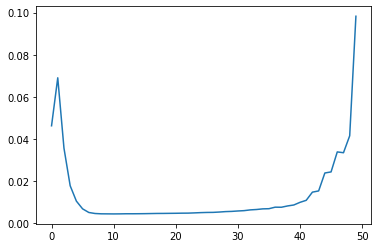

testing initialization 8/10
    starting test 1 out of 2
    starting test 2 out of 2
[0.05537189 0.05764177 0.03815746 0.02001065 0.01253919 0.00862289
 0.00613797 0.00550706 0.00536015 0.00532525 0.00530182 0.00531973
 0.00536945 0.00532749 0.00525363 0.00551948 0.00539548 0.00556314
 0.00569704 0.00576085 0.00595229 0.00599412 0.00623381 0.00597061
 0.00602796 0.00613652 0.00629852 0.00613063 0.00577649 0.00567925
 0.00578881 0.00604596 0.00610121 0.00641709 0.00656003 0.00656981
 0.00674656 0.00735742 0.00755672 0.00823036 0.00893136 0.01093582
 0.00977168 0.01592622 0.01990339 0.01734933 0.01858534 0.02366522
 0.04292594 0.0994417 ]


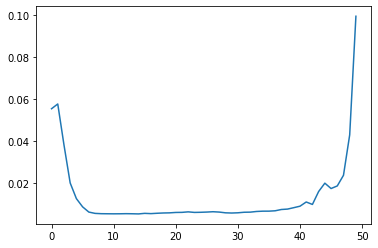

testing initialization 9/10
    starting test 1 out of 2
    starting test 2 out of 2
[0.0603252  0.08394154 0.04982984 0.02529256 0.01493395 0.00973281
 0.00715543 0.00661076 0.0063221  0.00631931 0.00617028 0.00595928
 0.00598576 0.00600286 0.0059754  0.00611619 0.00606958 0.006342
 0.00634277 0.00658059 0.00697679 0.00734746 0.0077422  0.00841119
 0.00846392 0.00815122 0.00792096 0.00777433 0.00714707 0.00736628
 0.00756632 0.00805745 0.0083677  0.00844756 0.00790446 0.00885178
 0.0093782  0.01017394 0.01092939 0.01274718 0.01677155 0.01438502
 0.01852307 0.02423059 0.0210694  0.02500033 0.0307222  0.03814945
 0.04815329 0.10309157]


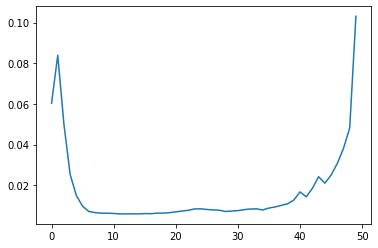

testing initialization 10/10
    starting test 1 out of 2
    starting test 2 out of 2
[0.05970974 0.07962513 0.04928046 0.0256847  0.01481319 0.00916779
 0.00704292 0.00630966 0.00630157 0.00638631 0.00624091 0.00607288
 0.00594607 0.0060514  0.00607892 0.00614347 0.00649553 0.00660841
 0.00635964 0.00626398 0.0063558  0.00654399 0.00659193 0.00661829
 0.00667852 0.00674862 0.00703112 0.00720369 0.00670798 0.00741807
 0.00741009 0.00768788 0.00738641 0.00777023 0.00783755 0.00850675
 0.01138845 0.01119909 0.01110317 0.00983799 0.01032857 0.01143284
 0.01242841 0.01187346 0.01691355 0.01858728 0.0205262  0.02865756
 0.04945066 0.10434354]


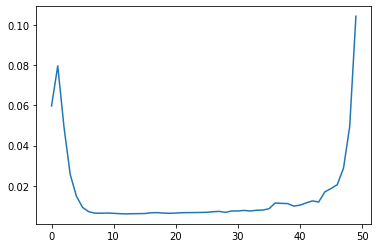

In [4]:
file_loc = 'RERank_tests/linear50_noBN'

in_layers = 3*32*32
hidden_layers = np.logspace(3.17, 1.2, 48).astype(int)
model_initializer = lambda: LN.LinearNet(in_layers, hidden_layers, 10, 
                                outf=nn.LogSoftmax(dim=1),
                                activationClass=LN.CReLU,
                                layerClass=LN.LinearHettingerInitOld,
                                batchnorm=False)

linear40_complete = fullRERankTest(train_loader, model_initializer, nn.CrossEntropyLoss, file_loc=file_loc)

relative effective rank: 0.007636737198086449


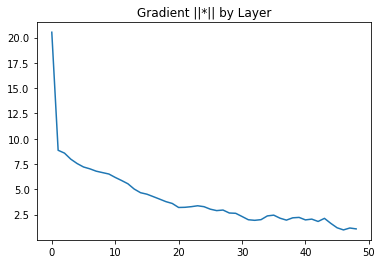

In [17]:
linear50nbn = dict()
linear50nbn['lossf'] = nn.CrossEntropyLoss()
linear50nbn['filename'] = '/models/linear50nbn.pt'


in_layers = 3*32*32
hidden_layers = np.logspace(3.17, 1.2, 48).astype(int)
linear50nbn['model'] = LN.LinearNet(in_layers, hidden_layers, 10, 
                                outf=nn.LogSoftmax(dim=1),
                                activationClass=LN.CReLU,
                                layerClass=LN.LinearHettingerInit,
                                batchnorm=False)
linear50nbn['optim'] = torch.optim.Adam(linear50nbn['model'].parameters())

# relative effective rank
linear50nbn['rel_eff_rank'], linear50nbn['norm_c'] = relative_effective_rank(linear50nbn['model'], train_loader, linear50nbn['lossf'],
                                               return_normalizing_constant=True)
print('relative effective rank:', linear50nbn['rel_eff_rank'])

# gradient magnitudes
magnitudes, means, stds = utils.gradient_statistics(linear50nbn['model'], train_loader, linear50nbn['lossf'])

plt.plot(np.arange(len(stds)), magnitudes)
plt.title('Gradient ||*|| by Layer')
plt.show()

epoch: 9, averaged loss: 1.644, accuracy: 27.94%: 100%|██████████| 782/782 [00:31<00:00, 24.92it/s]
epoch: 10, averaged loss: 1.606, accuracy: 30.06%: 100%|██████████| 782/782 [00:31<00:00, 24.94it/s]


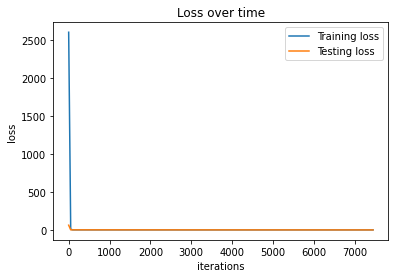

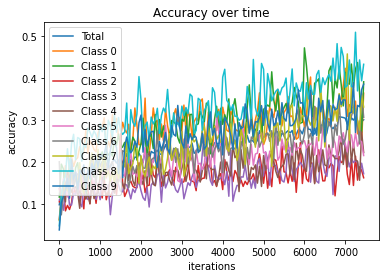

epoch: 11, averaged loss: 1.578, accuracy: 31.53%: 100%|██████████| 782/782 [00:31<00:00, 24.95it/s]
epoch: 12, averaged loss: 1.543, accuracy: 31.81%: 100%|██████████| 782/782 [00:31<00:00, 25.00it/s]
epoch: 13, averaged loss: 1.502, accuracy: 33.56%: 100%|██████████| 782/782 [00:31<00:00, 24.91it/s]
epoch: 14, averaged loss: 1.542, accuracy: 34.22%: 100%|██████████| 782/782 [00:31<00:00, 24.88it/s]
epoch: 15, averaged loss: 1.645, accuracy: 31.19%: 100%|██████████| 782/782 [00:31<00:00, 24.93it/s]
epoch: 16, averaged loss: 211616760.320, accuracy: 13.12%: 100%|██████████| 782/782 [00:31<00:00, 24.98it/s]     
epoch: 17, averaged loss: 67026498.480, accuracy: 14.09%: 100%|██████████| 782/782 [00:31<00:00, 24.95it/s] 
epoch: 18, averaged loss: 34654312.000, accuracy: 12.91%: 100%|██████████| 782/782 [00:31<00:00, 24.90it/s] 
epoch: 19, averaged loss: 41998123.040, accuracy: 12.38%: 100%|██████████| 782/782 [00:31<00:00, 24.92it/s]
epoch: 20, averaged loss: 32445982.740, accuracy: 12.84

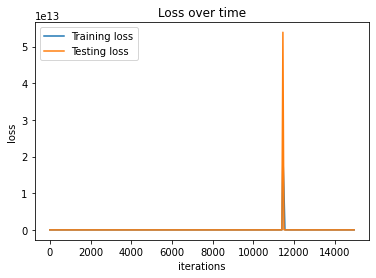

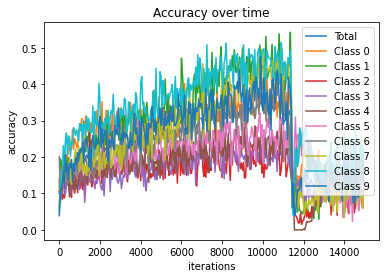

epoch: 21, averaged loss: 22603434.900, accuracy: 13.66%: 100%|██████████| 782/782 [00:31<00:00, 25.01it/s]
epoch: 22, averaged loss: 15985759.460, accuracy: 14.16%: 100%|██████████| 782/782 [00:31<00:00, 25.06it/s]
epoch: 23, averaged loss: 10910393.330, accuracy: 13.28%: 100%|██████████| 782/782 [00:31<00:00, 25.07it/s]
epoch: 24, averaged loss: 5963379.050, accuracy: 13.97%: 100%|██████████| 782/782 [00:31<00:00, 25.03it/s] 
epoch: 25, averaged loss: 8554983.460, accuracy: 13.84%: 100%|██████████| 782/782 [00:31<00:00, 25.00it/s] 
epoch: 26, averaged loss: 3235107.482, accuracy: 14.12%: 100%|██████████| 782/782 [00:31<00:00, 25.11it/s]
epoch: 27, averaged loss: 2769646.757, accuracy: 15.16%: 100%|██████████| 782/782 [00:31<00:00, 25.05it/s]
epoch: 28, averaged loss: 1114007678671642.750, accuracy: 9.78%: 100%|██████████| 782/782 [00:31<00:00, 25.11it/s]
epoch: 29, averaged loss: 4027246090.240, accuracy: 11.69%: 100%|██████████| 782/782 [00:31<00:00, 24.94it/s] 
epoch: 30, averaged 

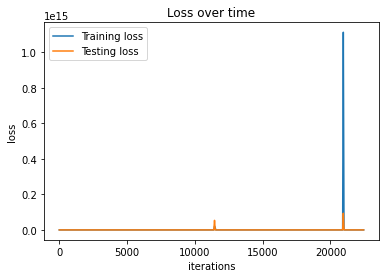

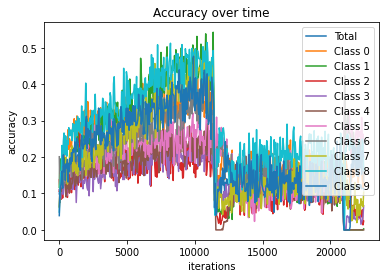

epoch: 31, averaged loss: 367700295.040, accuracy: 10.63%: 100%|██████████| 782/782 [00:31<00:00, 24.97it/s]
epoch: 32, averaged loss: 264152056.320, accuracy: 11.38%: 100%|██████████| 782/782 [00:31<00:00, 25.05it/s]
epoch: 33, averaged loss: 388313538.560, accuracy: 10.88%: 100%|██████████| 782/782 [00:31<00:00, 24.95it/s]
epoch: 34, averaged loss: 196525962.560, accuracy: 11.66%: 100%|██████████| 782/782 [00:31<00:00, 24.99it/s]
epoch: 35, averaged loss: 170880383.680, accuracy: 12.13%: 100%|██████████| 782/782 [00:31<00:00, 25.01it/s]
epoch: 36, averaged loss: 170251688.960, accuracy: 11.09%: 100%|██████████| 782/782 [00:31<00:00, 24.95it/s]
epoch: 37, averaged loss: 137380216.480, accuracy: 11.03%: 100%|██████████| 782/782 [00:31<00:00, 24.91it/s]
epoch: 38, averaged loss: 80056545.680, accuracy: 12.44%: 100%|██████████| 782/782 [00:31<00:00, 25.02it/s] 
epoch: 39, averaged loss: 1683160765204789.000, accuracy: 10.00%: 100%|██████████| 782/782 [00:31<00:00, 24.97it/s]
epoch: 40, a

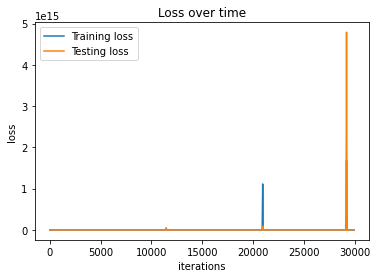

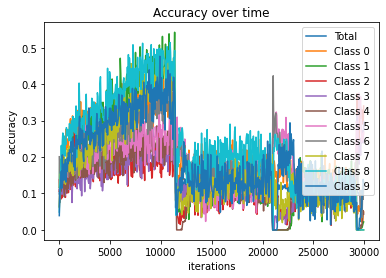

epoch: 41, averaged loss: 5812022737.920, accuracy: 11.28%: 100%|██████████| 782/782 [00:31<00:00, 24.94it/s]
epoch: 42, averaged loss: 3250583142.400, accuracy: 11.28%: 100%|██████████| 782/782 [00:31<00:00, 25.02it/s]
epoch: 43, averaged loss: 3669491479.040, accuracy: 11.84%: 100%|██████████| 782/782 [00:31<00:00, 25.09it/s]
epoch: 44, averaged loss: 2283815918.080, accuracy: 12.34%: 100%|██████████| 782/782 [00:31<00:00, 24.94it/s]
epoch: 45, averaged loss: 3425778225.920, accuracy: 10.59%: 100%|██████████| 782/782 [00:31<00:00, 25.03it/s]
epoch: 46, averaged loss: 2124975040.000, accuracy: 10.00%: 100%|██████████| 782/782 [00:31<00:00, 25.15it/s]
epoch: 47, averaged loss: 1330400494.080, accuracy: 12.25%: 100%|██████████| 782/782 [00:31<00:00, 25.11it/s]
epoch: 48, averaged loss: 784776459.520, accuracy: 10.81%: 100%|██████████| 782/782 [00:31<00:00, 24.99it/s] 
epoch: 49, averaged loss: 610267723.520, accuracy: 11.59%: 100%|██████████| 782/782 [00:31<00:00, 24.97it/s]
epoch: 50, 

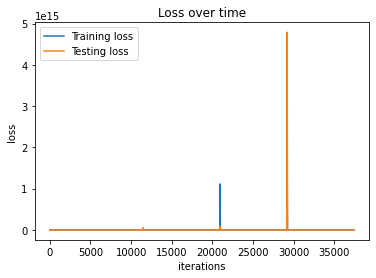

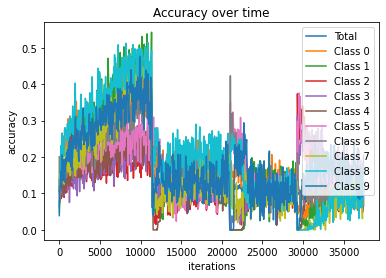

In [18]:
losses_train, losses_test, accuracy, per_class_accuracy = [], [], [], []
optimizer = linear50nbn['optim']
loss_func = linear50nbn['lossf']


linear50nbn['model'], losses_train, losses_test, accuracy, per_class_accuracy = utils.train(linear50nbn['model'], 
                                                                      train_loader, test_loader, optimizer, loss_func, num_classes=10,
                                                                      losses_train=[], losses_test=[], accuracy=[], per_class_accuracy=[], 
                                                                      weight=None, epochs=50, batch_size=500, label_smoothing=False,
                                                                      graph_skip=50, tqdm_bool=True, plot_every=10)

# Conv50

In [13]:
conv50 = dict()
conv50['lossf'] = nn.NLLLoss()
conv50['filename'] = '/models/conv50.pt'

hidden_layers = [3] +  [64]*21 + [128]*21
conv50['model'] = LN.BlockNet(3, hidden_layers, 10, block_type=LN.ConvBlock, objective_func=nn.LogSoftmax(dim=1))
conv50['optim'] = torch.optim.Adam(conv50['model'].parameters())

In [14]:
conv50['rel_eff_rank'], conv50['norm_c'] = relative_effective_rank(conv50['model'], train_loader, conv50['lossf'],
                                               return_normalizing_constant=True, n_ave=5, which_layer=1)
print(conv50['rel_eff_rank'])

(1728, 256)
0.2151395413299681


testing conv50 initialization 1/10
    starting test 1 out of 2
    starting test 2 out of 2
[0.27831332 0.06481836 0.22583946 0.13554729 0.3916078  0.29082543
 0.42489187 0.36600705 0.42487021 0.36061476 0.45486628 0.28532199
 0.43414454 0.32362734 0.45985643 0.28331935 0.48478042 0.24485348
 0.43350519 0.39510328 0.44310621 0.34072709 0.47731208 0.32887046
 0.46433693 0.28410773 0.43136886 0.23481046 0.44289236 0.2850189
 0.41565603 0.28306638 0.4152628  0.30126245 0.4306255  0.37028531
 0.477967   0.35999005 0.4851746  0.25117825 0.42294082 0.37988641
 0.4390192  0.30638164 0.56178172 0.45135652 0.53491262 0.52391898
 0.56728823 0.42836515 0.57873282 0.47281542 0.55976982 0.4570279
 0.57052938 0.51438227 0.57996537 0.48260482 0.57631229 0.458913
 0.57356271 0.39196103 0.57623657 0.52709064 0.60821752 0.45846832
 0.57946685 0.38173593 0.62389103 0.42000304 0.58537298 0.4377506
 0.58378478 0.46900989 0.56968112 0.35847575 0.5608829  0.40257132
 0.5453511  0.34260942 0.59172083 0.53586

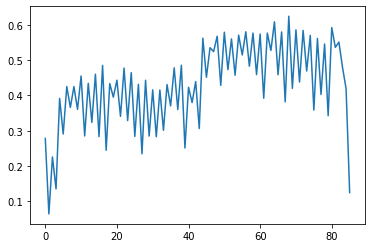

testing conv50 initialization 2/10
    starting test 1 out of 2
    starting test 2 out of 2
[0.24505328 0.06556819 0.11995405 0.1644491  0.37812493 0.37258679
 0.42316905 0.3397447  0.43506799 0.37900449 0.45647633 0.36649944
 0.43607399 0.28924108 0.4459686  0.40591426 0.41180398 0.27352005
 0.47881327 0.39917143 0.41725173 0.31186529 0.46287687 0.33610981
 0.49300522 0.26483986 0.46506836 0.25667435 0.45211652 0.29775142
 0.42804873 0.32942853 0.4253672  0.33972064 0.42573676 0.31106462
 0.40976853 0.29189549 0.40691474 0.25200191 0.44035542 0.32225912
 0.44028763 0.31485538 0.46790445 0.29402377 0.45480809 0.4127004
 0.45347684 0.29645608 0.45448589 0.41619383 0.49266048 0.43392809
 0.49741443 0.40250154 0.52107291 0.34422813 0.52128572 0.42530121
 0.53409057 0.34108299 0.55624694 0.49575081 0.57006511 0.36945551
 0.57314115 0.4255931  0.53798816 0.43066364 0.51833817 0.44235793
 0.5027928  0.45530321 0.51764578 0.37031905 0.47321202 0.39129597
 0.51995522 0.39951413 0.53844029 0.3

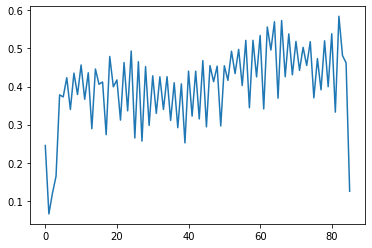

testing conv50 initialization 3/10
    starting test 1 out of 2
    starting test 2 out of 2
[0.22932406 0.07706715 0.26072538 0.21227949 0.31819256 0.29176827
 0.33603899 0.29489077 0.33679233 0.28410906 0.32751856 0.28385972
 0.323829   0.30437934 0.3503522  0.27429852 0.30388772 0.16253042
 0.39643289 0.33530619 0.36270908 0.23882276 0.38351571 0.36622767
 0.37703326 0.34820671 0.40777558 0.33748925 0.43303866 0.31812727
 0.44447426 0.23978829 0.45218625 0.35572851 0.43706539 0.3213647
 0.47041513 0.33005846 0.46695547 0.33831986 0.4644481  0.33049071
 0.47261822 0.33195604 0.50468486 0.42855135 0.50562532 0.45504846
 0.50478036 0.41035593 0.50451052 0.43031804 0.50245611 0.43900753
 0.47784866 0.40813622 0.46266217 0.40332448 0.45807548 0.26450345
 0.49635579 0.42783308 0.50872561 0.33666229 0.45988769 0.33340134
 0.47503609 0.40105986 0.48475717 0.42824017 0.46736743 0.43078509
 0.46076584 0.42485344 0.46432057 0.41829615 0.4527977  0.40488406
 0.45544578 0.3805076  0.43547596 0.4

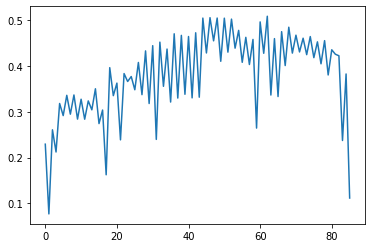

testing conv50 initialization 4/10
    starting test 1 out of 2
    starting test 2 out of 2
[0.23664778 0.06909674 0.24279688 0.19030309 0.34446438 0.28938479
 0.3840815  0.27344237 0.39269807 0.28187577 0.39550246 0.26763945
 0.38681049 0.32254836 0.39177702 0.34723044 0.41536938 0.34338888
 0.38917816 0.26080906 0.38806325 0.34618355 0.41660438 0.36218649
 0.40557549 0.33573635 0.42344031 0.21605405 0.3464726  0.24597099
 0.47798687 0.33706595 0.45211964 0.31824599 0.50912682 0.33847589
 0.49295398 0.3778796  0.42716344 0.19194722 0.45507611 0.33165886
 0.42509842 0.30722484 0.52128036 0.42829896 0.49147642 0.30579189
 0.53404679 0.41056278 0.52990188 0.29452958 0.58571149 0.39683882
 0.58666799 0.41900436 0.60534659 0.47056309 0.58633733 0.49110608
 0.61508454 0.47297872 0.59625727 0.40973979 0.58966394 0.46459491
 0.57237372 0.44142126 0.57431549 0.44482994 0.56671549 0.38375874
 0.5831996  0.47670854 0.60326991 0.45661332 0.57705417 0.34654859
 0.57478063 0.42571703 0.56438778 0.

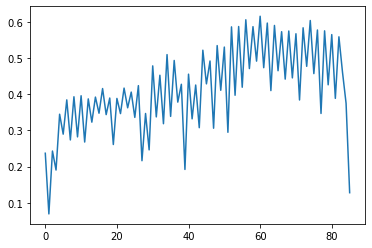

testing conv50 initialization 5/10
    starting test 1 out of 2
    starting test 2 out of 2
[0.20754374 0.0530916  0.17251453 0.18704565 0.27084519 0.2411
 0.31326055 0.24551445 0.30424027 0.25976087 0.31904705 0.30294604
 0.30569906 0.29917008 0.33290276 0.30439436 0.33160171 0.19911279
 0.35085425 0.33796633 0.37007553 0.31886278 0.34825679 0.30794455
 0.35817825 0.27425538 0.38760685 0.30864284 0.3700569  0.26588208
 0.37818918 0.31245151 0.36536631 0.27081896 0.36395149 0.26666459
 0.3451044  0.33106697 0.3803884  0.33947538 0.36581541 0.33151126
 0.36691651 0.29733383 0.3370843  0.18099699 0.46981591 0.41501033
 0.47553652 0.39356193 0.47317976 0.41469187 0.47432858 0.37492109
 0.47668253 0.42760187 0.47583305 0.46145196 0.48267979 0.43200876
 0.46833413 0.27478517 0.51671403 0.34993395 0.61005625 0.50737223
 0.59101961 0.42719459 0.61611933 0.41693619 0.55641524 0.45993059
 0.59347771 0.46263209 0.60089705 0.46619918 0.62259795 0.47825422
 0.60853134 0.4759916  0.53023887 0.4529

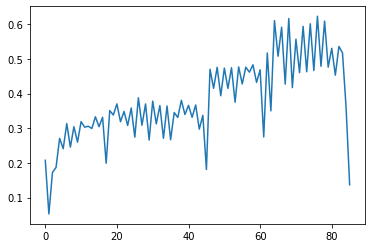

testing conv50 initialization 6/10
    starting test 1 out of 2
    starting test 2 out of 2
[0.21948104 0.14352355 0.1369879  0.18058261 0.30889989 0.29489394
 0.35384534 0.28352027 0.35322224 0.31046013 0.35900866 0.32301617
 0.34511463 0.31436515 0.33075087 0.30177878 0.31572254 0.30847875
 0.31582621 0.33059817 0.34551294 0.31250951 0.33594788 0.3117302
 0.35968745 0.26199831 0.34789766 0.32031131 0.36852137 0.30707941
 0.36521627 0.30278736 0.36601917 0.31407655 0.39745314 0.33164797
 0.4236479  0.28799798 0.4384668  0.32682789 0.40762589 0.30657494
 0.40701402 0.30956321 0.40786144 0.33041063 0.39201164 0.37523738
 0.40499688 0.36891213 0.3724777  0.37108318 0.36383796 0.23509064
 0.52179773 0.46150143 0.50909825 0.2785949  0.55287986 0.44389542
 0.56943754 0.37712345 0.55140678 0.36490892 0.61420976 0.46650929
 0.61816902 0.50500934 0.60346042 0.43280663 0.56114024 0.4063658
 0.58664045 0.42553541 0.59398256 0.44220462 0.57928805 0.43541939
 0.59824352 0.39793209 0.58834121 0.47

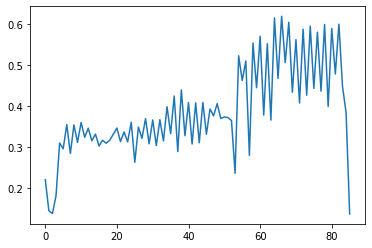

testing conv50 initialization 7/10
    starting test 1 out of 2
    starting test 2 out of 2
[0.1952298  0.08520025 0.14717825 0.17028915 0.3425316  0.27679781
 0.3402031  0.29136554 0.3454405  0.27648244 0.35403394 0.29054552
 0.34512418 0.29168557 0.34560349 0.28977746 0.33791789 0.30751584
 0.36065466 0.29471052 0.32904271 0.31928065 0.33546141 0.30694529
 0.35485344 0.26412885 0.35214648 0.31488701 0.3374076  0.27037985
 0.35925043 0.31733369 0.31304295 0.24894711 0.31037954 0.15870574
 0.44547667 0.27279278 0.45594885 0.34632099 0.38777273 0.18778771
 0.44613564 0.26130903 0.5389256  0.35484173 0.53152605 0.41621154
 0.55445258 0.43650668 0.55500199 0.46755226 0.58639403 0.38650932
 0.57005239 0.44645555 0.52586953 0.43613203 0.57972054 0.42094492
 0.56847186 0.34917477 0.57933549 0.38763875 0.56853984 0.46121964
 0.59253767 0.43771711 0.58757534 0.39656113 0.59172801 0.48888126
 0.57653024 0.43402035 0.61838093 0.40519784 0.61729255 0.43334246
 0.61883942 0.35063941 0.60367664 0.

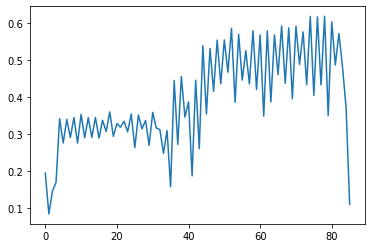

testing conv50 initialization 8/10
    starting test 1 out of 2
    starting test 2 out of 2
[0.25523935 0.06644032 0.24782    0.22250166 0.35144395 0.33928328
 0.38647345 0.32641704 0.41041749 0.31581968 0.41916689 0.31520686
 0.41967126 0.33269355 0.40121274 0.32636652 0.38083894 0.29119482
 0.39092533 0.27552348 0.37588352 0.3011108  0.43878817 0.24848371
 0.47415395 0.36352357 0.40658425 0.32790093 0.45732534 0.39042829
 0.45174671 0.3771537  0.46717829 0.28225223 0.48069312 0.27676218
 0.47995863 0.34280394 0.49452975 0.2683162  0.4833858  0.35362094
 0.42662224 0.27950623 0.54335615 0.35821396 0.51831908 0.41380237
 0.53619374 0.43554898 0.54850273 0.38421447 0.56980643 0.51939188
 0.56065991 0.4603016  0.58228556 0.3424189  0.55623354 0.45678941
 0.53787276 0.42098989 0.52674592 0.45509862 0.55117036 0.47841823
 0.56473392 0.3945341  0.53823277 0.41607319 0.56600042 0.45300102
 0.53320893 0.38565399 0.56943255 0.29674581 0.64632337 0.48168307
 0.57987981 0.44370269 0.53998939 0.

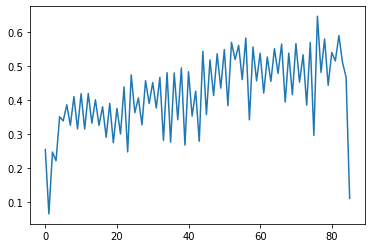

testing conv50 initialization 9/10
    starting test 1 out of 2
    starting test 2 out of 2
[0.31293504 0.08242146 0.1250007  0.16981675 0.29383516 0.24016442
 0.36906154 0.33240554 0.36998123 0.28698312 0.37600048 0.32214765
 0.3977815  0.34138713 0.40807312 0.32032893 0.39901883 0.21161202
 0.4168953  0.36609427 0.42064216 0.35539921 0.4476892  0.3283112
 0.4472201  0.33044828 0.39513526 0.30831718 0.47674291 0.32116371
 0.41470244 0.35258969 0.44860945 0.32075308 0.44991085 0.36300008
 0.46543696 0.30595881 0.42486048 0.34258677 0.47974978 0.3093096
 0.47112666 0.39095312 0.46456616 0.3889042  0.471276   0.401276
 0.48532109 0.39969339 0.48852273 0.3938961  0.47182228 0.26159165
 0.55119735 0.45328358 0.54866952 0.44892603 0.51898356 0.29629578
 0.5359224  0.33969006 0.56186745 0.48099063 0.56464332 0.39811369
 0.55099807 0.42771049 0.53495773 0.48770907 0.55255152 0.45567669
 0.54106475 0.37489969 0.54461168 0.42776833 0.57194277 0.36575682
 0.56534005 0.49045428 0.53264053 0.4478

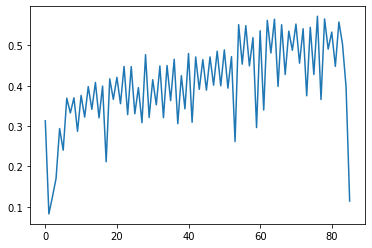

testing conv50 initialization 10/10
    starting test 1 out of 2
    starting test 2 out of 2
[0.16745859 0.04734606 0.24399501 0.20018893 0.3058715  0.23770185
 0.36899579 0.32983701 0.36768958 0.31451651 0.38005358 0.33605857
 0.36739735 0.32433046 0.34526801 0.28330216 0.36148853 0.30897962
 0.36548299 0.29221807 0.35429747 0.27637226 0.33050527 0.29060512
 0.34464359 0.27815906 0.3049347  0.24441506 0.31008511 0.21281063
 0.28729446 0.26272744 0.28325286 0.17443556 0.2887207  0.24574076
 0.28709053 0.28324646 0.29369352 0.23509574 0.28390248 0.24895566
 0.27924539 0.20126539 0.3143034  0.24324144 0.40276684 0.40683023
 0.39246269 0.37205656 0.43515014 0.41723381 0.41039417 0.24562065
 0.55478728 0.42255759 0.5517035  0.34907936 0.54821531 0.4681798
 0.51554181 0.43049305 0.60587509 0.45716313 0.5533001  0.41680944
 0.55936197 0.39858307 0.5735152  0.47201413 0.54623649 0.35986492
 0.56255162 0.38291485 0.57470419 0.3676691  0.60250686 0.44749136
 0.56686961 0.31610876 0.53419382 0.

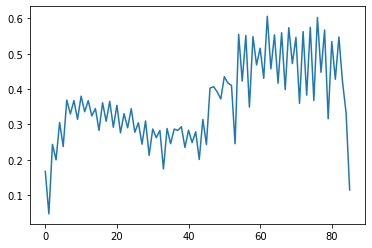

In [3]:
conv50 = dict()
for i in range(10):
    print(f'testing conv50 initialization {i+1}/10')
    conv50[f'trial {i}'] = dict()
    lossf = nn.NLLLoss()

    hidden_layers = [3] +  [64]*21 + [128]*21
    conv50[f'trial {i}']['model'] = LN.BlockNet(3, hidden_layers, 10, block_type=LN.ConvBlock, objective_func=nn.LogSoftmax(dim=1))
    # conv50['optim'] = torch.optim.Adam(conv50['model'].parameters())
    
    if i == 0:
        conv50[f'trial {i}']['rel_eff_rank'], conv50['norm_c'] = relative_effective_rank(conv50[f'trial {i}']['model'], train_loader, lossf,
                                                                            return_normalizing_constant=True, n_ave=2, 
                                                                            which_layers='all', wrt_input=True)
    else:
        conv50[f'trial {i}']['rel_eff_rank'] = relative_effective_rank(conv50[f'trial {i}']['model'], train_loader, lossf,
                                                                       normalizing_constants=conv50['norm_c'],
                                                                       return_normalizing_constant=False, n_ave=2, 
                                                                       which_layers='all', wrt_input=True)
    print(conv50[f'trial {i}']['rel_eff_rank']) 
    plt.plot(conv50[f'trial {i}']['rel_eff_rank'])
    plt.show()

torch.save(conv50, 'preliminary_test_conv50_corrected_ReLU.mf')
utils.play_alert()

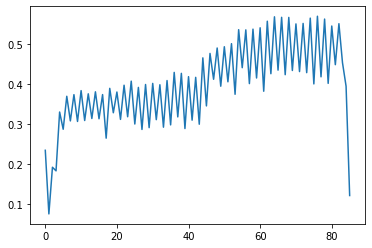

In [4]:
#conv50 = torch.load('preliminary_test_conv50_corrected_ReLU.mf')
RERanks = np.zeros(len(conv50['trial 0']['rel_eff_rank']))
for i in range(10):
    RERanks += conv50[f'trial {i}']['rel_eff_rank']/10
    
plt.plot(RERanks)